# DSC 80
The Practice and Application of Data Science

Winter 2019

## Lecture Outline
* Introduction
* What's a "practicing data scientist"?
* Course overview
* The "Data Science Workflow"

# San Diego Employee Example

* Exhibit all three types of "data scientist"
* Understand dataset (trustable?)
* Gender/Age questions
* Baseline against cities?

# What is a data scientist?
* [The Venn Diagram](http://drewconway.com/zia/2013/3/26/the-data-science-venn-diagram), Drew Conway, 2010

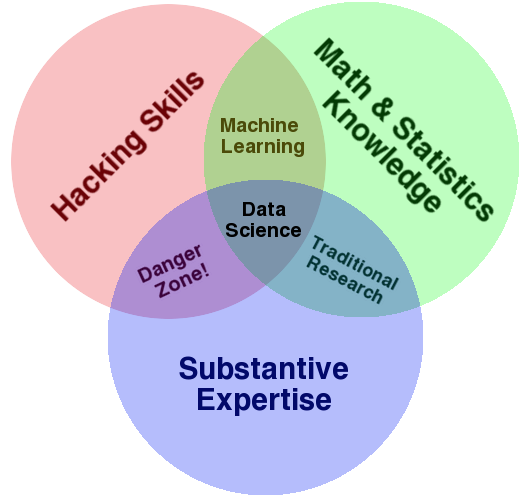

* A bit dated

# What is a data scientist?
* [Battle of the Data Science Venn Diagrams](http://www.prooffreader.com/2016/09/battle-of-data-science-venn-diagrams.html)
* Stephan Kolassa, 2014

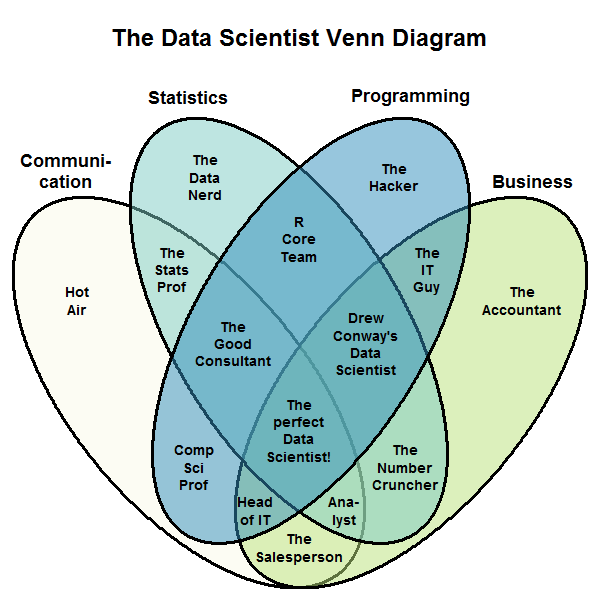

* Much freedom for finding the right niche!
* Understanding a little of everything allows you to not depend on others

## What is a data scientist?

* Extracts usable information from data
* Uses that information to answer questions
* Uses that information to solve problems

# Data Science Examples

## Predicting Elections
* What does the electorate look like?
* What are the important traits?
* How do we gather/measure those traits?
* Quantify into a model / Draw conclusion with confidence!

## Internet Advertisements
Can using internet ads increase a dealership's truck sales?

* How likely is a person to click on my ad (who is it shown to?)
* How do ad clicks translate to sales? 
    - are my ads *causing* higher sales? Should I continue buying them?
* What data should I collect?

## Image recognition for celebrity GIFs
Can I resolve celebrity faces for my cool product?
* What is my data?
* What's my metric for success?
* In what way does it underperform?

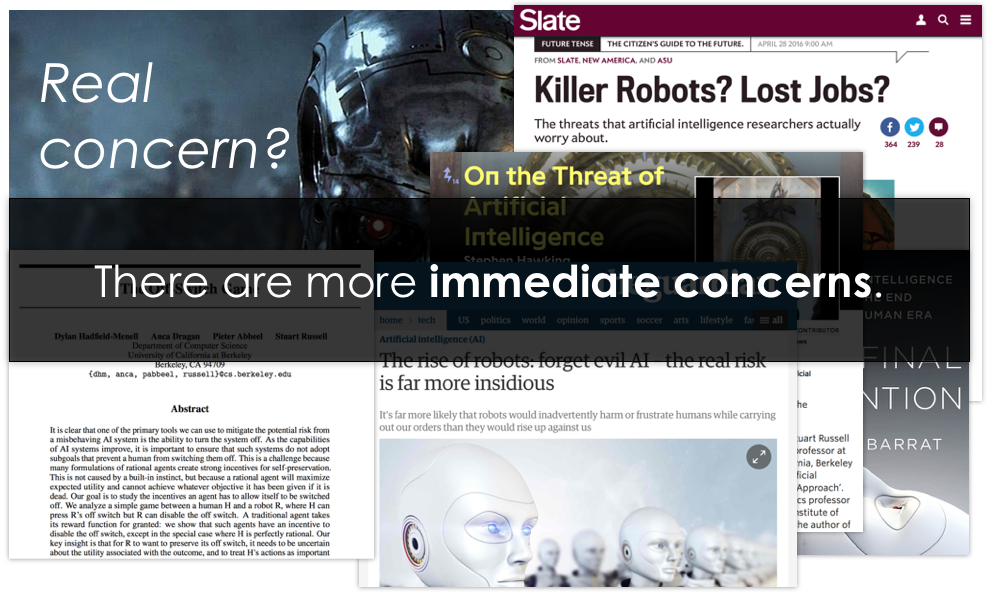

## Data Science requires responsible practice

* Easy to obscure complex decisions made with data:
    - Mortgage backed securities => market crash.
    - Hiring decision; criminal sentencing.
    - Hyper-personalized ad recommendations.
* Reinforcing historical trends and biases:
    - Hiring based on previous hiring data.
    - Criminal sentencing using previous decisions.
    - Social media, news, and politics

* Data is generated by people; treat people responsibly!

## Course Goals

* Understand and clean realword data!
* Exposure to real data tools.
* Give context on how what you'll learn in later courses is used.
* Give a taste of the "life of a data scientist?"

### Course Outcomes

* Structure of a data project
* Computational and Statistical concerns working with data
* Exposure to different data types:
    - Tabular, web data, unstructured text, geographical data, time series data
* Exposure to the data scientist toolkit:
    - git, bash, pandas/numpy, scikit learn

# Course Information

## Aaron Fraenkel

* Joined UCSD Data Science this Fall.
* Before UCSD:
    - Senior Machine Learning Scientist @ Amazon
    - Postdoctoral Scolar @ Penn State, Boston College
    - BA / PhD from UC Berkeley (Math)
    
* Not working:
    - All things outdoors; bay area sports; hacking on data.

## Marina Langlois

* 

## Course Materials and Information

* The course [github repository](https://github.com/ucsd-ets/dsc80-wi19): assignments, lectures, references.
    - https://github.com/ucsd-ets/dsc80-wi19
* The course [website](https://sites.google.com/view/dsc-80-winter-2019/): syllabus, links, schedule.
    - https://sites.google.com/view/dsc-80-winter-2019/

##  Course Components

|Component|Percentage|
|---|---|
|Homeworks (10, weekly)|30%|
|Projects (5, bi-weekly)|30%|
|Midterm (mid-quarter)|15%|
|Final|25%|


## Course Materials

* This is a new course (anywhere!); be patient, please. 😁
* We have no book; we will give you resources/links where appropriate.
* Learning (new) real tools require doing your own research!
* Using real data requires doing your own research!
* *You* will be responsible for assessing the correctness of your research!

## Primary references

* Wes McKinney. "Python for Data Analysis" ([Link - requires UCSD internet](proquest.safaribooksonline.com/9781449323592))
* Sam Lau, Joey Gonzalez, and Deb Nolan. "Principles and Techniques of Data Science" (https://www.textbook.ds100.org/)
* Ani Adhikari and John DeNero. "Computational and Inferential Thinking" (https://www.inferentialthinking.com)

# The Data Science Lifecycle

### The Scientific Method

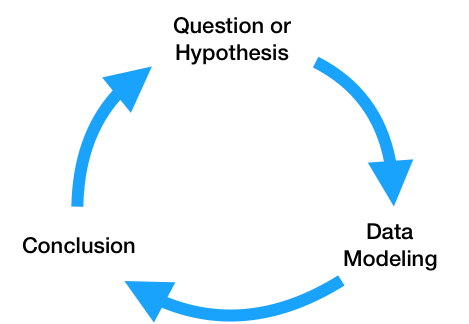

### The scientific method hides complexity
* From what context did your hypothesis come?
* What data are you using/measuring?
    - What if the data isn't sufficient?
* Under which conditions are the conclusions valid?

### The Data Science Lifecycle
* Everything leads to more questions!

<img src="imgs/DSLC.png" width="50%">

### Research Domain
* What subject do we care about?
* How is relevant data generated?

### Question or Hypothesis
* What do we want to know?
* What problem are we trying to solve?
* What are our metrics for success?
* Hypotheses are refined from any stage of work!

### Find and Clean Data
* What data exists and can it answer the question?
* Do we need to collect/measure our own data?
* Cleaning the data is organizing it for analysis.

### Data Modeling
* What assumptions are made of data to draw conclusions?
* What biases or anomalies exist in the data?
* How is the data simplified to use for predictions and inference?

### Predictions and Inference
* What does the data say about the world?
* Does it answer our questions? Solve our problem?
* Can we trust our conclusions and predictions?

# Example: SD Employee Salaries

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import util

## Example: SD Employee Salaries

* Build a "profile" of city of SD employees?
* Which jobs make more/less? How much?
* Who works part-time? full-time?
* Are salaries "fair"?

### SD Employee Salaries: background research

* Why try to understand this dataset?
    - Such a profile could inform 3rd party workplace programs.
    - Journalists might search for salary anomalies.
    - Auditors may want actionable advice on fair employment practices.

### Initial look at the data
* [Transparent California](https://transparentcalifornia.com/salaries/san-diego/) salary website.

In [ ]:
salary_path = util.safe_download('https://transcal.s3.amazonaws.com/public/export/san-diego-2017.csv')

In [ ]:
salaries = pd.read_csv(salary_path)
salaries

### Aside on privacy and ethics

* Employee names correspond to *real* people.
* PII (personably identifiable information).
* Legal vs Ethical:
    - Public record vs Searchable record.
    - Don't propagate people's data.

### Basic description of employee pay
* What does "typical" look like?
* Any questions about data reliability?

In [ ]:
# .T is for transpose()

salaries.describe().T

* Negative payments? Near zero salaries?
* Where is "Other Pay"?
* Max values -- are outliers real?

### Empirical Distribution of Salaries
* Bimodal (two distributions?)
* Typical skew: Pay > 0

In [ ]:
salaries['Total Pay'].plot(kind='hist', bins=50, density=True);

### Empirical Distribution of Salaries
* Part-time vs full-time

In [ ]:
bystatus = salaries.groupby('Status')
bystatus['Total Pay'].plot(kind='kde', alpha=0.5, title='Salary by Full-time/Part-time')
plt.legend(bystatus.groups);

### Do women earn similar pay to their contemporaries?
* Do employees of different genders have similar pay?
* Don't have gender information in our salary data.
    - Do have (first) names of employees!
    - Join to Social Security Administration "baby names" dataset!

In [ ]:
names_path = util.safe_download('https://www.ssa.gov/oact/babynames/names.zip')

In [ ]:
from glob import glob
import os

filelist = glob(os.path.join(names_path, '*.txt'))
df_list = [pd.read_csv(f, names=['firstname', 'gender', 'count']).assign(year=f[-8:-4]) for f in filelist]

names = pd.concat(df_list)

### SSA names dataset
* Contains the list of names on social security applications
* For each name, it contains:
    - the number of applications per year identified as Male/Female
* We want a list of names and most likely gender to join to `salaries`.

### Basic check of `names`:
* Many names identify to both genders.
* Most names occur only a few times per year.
* A few names occur very often.

In [ ]:
# glance at data
names.head()

In [ ]:
# look at a single name
names[names['firstname'] == 'Madison']

In [ ]:
# look at statistics of counts
names.describe()

### Approach:
* Create a data frame of distinct names with the proportion of applications on which that name identifies as female. 
* That is, for each name $N$, we compute:

$$P({\rm person\ is\ female\ }|{\rm \ person\ has\ first\ name\ } N)$$

* Join this data frame to the salaries dataset

### Calculate names and their most likely genders

In [ ]:
# Counts by gender

cnts_by_gender = names.groupby(['firstname', 'gender']).sum().reset_index().pivot('firstname', 'gender', 'count').fillna(0)
cnts_by_gender

In [ ]:
# proportion of a given name that's identified female
prop_female = (cnts_by_gender['F'] / cnts_by_gender.sum(axis=1))
prop_female.head(10)

In [ ]:
genders = prop_female.rename('prop_female').to_frame().assign(gender=np.where((prop_female > 0.5), 'F', 'M'))
genders.head()

### Add a given name column to `salaries` and join names

In [ ]:
# Add firstname column
salaries['firstname'] = salaries['Employee Name'].str.split().apply(lambda x:x[0])
salaries

In [ ]:
# join gender
salaries_with_gender = salaries.merge(genders, on='firstname', how='left')
salaries_with_gender.head()

### Do women earn similar pay to their contemporaries?
* Is this difference significant, or just noise?

In [ ]:
pd.concat([
    salaries_with_gender.groupby('gender')['Total Pay'].describe().T,
    salaries_with_gender['Total Pay'].describe().rename('All')
], axis=1)

### Use a hypothesis test
* Can women's median pay be explained as a random subset of the population of city of SD salaries?
    - If so, the salary of women doesn't significantly differ from the population
    - If not, some other mechanism is needed to explain the difference!

In [ ]:
# size of sample is number of women:
n_female = (salaries_with_gender['gender'] == 'F').sum()


# calculate observed 
female_median = salaries_with_gender.loc[salaries_with_gender['gender'] == 'F']['Total Pay'].median()


# simulate 1000 draws from the population of size n_female
medians = []
for _ in np.arange(1000):
    median = salaries_with_gender.sample(n_female)['Total Pay'].median()
    medians.append(median)

In [ ]:
title='Median salary of randomly chosen groups from population'
pd.Series(medians).plot(kind='hist', title=title);
plt.plot([female_median], [0], marker='o', markersize=10)
plt.legend(['Observed Median Salary of Women', 'Median Salaries of Random Groups']);

## Truism of data science

* Answering one question always raises 10 more.

### Questions:

* Can we trust the SD employee population?
* Can we trust the name-to-gender assignment?
* Can we trust our join?
* Is the disparity correlated to pay-type? job status? job type?
* What is the cause of the disparity?

### Can we trust the SD employee population?

* Look up the "transparent california" and verify this dataset is a *census* (everyone).
* Is "Total Pay" the most appropriate field to use?
* Cross-reference independent counts of city of SD employees to assess the salary data.

### Can we trust the name-to-gender assignment?
* How many names are borderline male/female?
* Does it make sense we incorporate name usage from 1880-2017?

In [ ]:
title = 'distribution of gendered-ness of names\n 0 = masculine \n 1 = feminine'
prop_female.plot(kind='hist', bins=20, title=title);

### Can we trust our join?
* Are there names in the salary dataset that aren't in the SSA dataset?
    - Who might not be in the SSA dataset? 
    - Might they be biased toward certain salaries?
* Does the salary dataset have a disproportionately large portion of unisex names.
* Is it better to use a subset of the SSA dataset (e.g. by state?)
    - Do the gender of names typically vary by geography?

### Can we trust our join?

In [ ]:
# proportion of employees not in SSA dataset
salaries_with_gender['gender'].isnull().mean()

In [ ]:
# Description of total pay by joined vs not joined
(
    salaries_with_gender
    .assign(joined=salaries_with_gender['gender'].notnull())
    .groupby('joined')['Total Pay']
    .describe()
    .T
)

In [ ]:
nonjoins = salaries_with_gender.loc[salaries_with_gender['gender'].isnull()]

title = 'Distribution of Salaries'
nonjoins['Total Pay'].plot(kind='hist', bins=50, alpha=0.5, density=True, sharex=True)
salaries_with_gender['Total Pay'].plot(kind='hist', bins=50, alpha=0.5, density=True, sharex=True, title=title)
plt.legend(['Not in SSA','All']);

### Can we trust our join?
* Lesson: joining to another dataset can bias your sample! 

### Is the pay disparity correlated to another field? job status? job type?
* Is the proportion of women in a job type correlated to pay?
    - Controlling for job type, do women earn similar salaries?

In [ ]:
# select jobs with word 'fire' in them
firejobs = salaries_with_gender.loc[salaries_with_gender['Job Title'].str.contains('Fire')]
firejobs.head()

In [ ]:
# Proportion of fire-related jobs held by women
(firejobs['gender'] == 'F').mean()

In [ ]:
# Pay Statistics for fire-related jobs
firejobs['Total Pay'].describe()

In [ ]:
# select jobs with library related jobs
libjobs = salaries_with_gender.loc[salaries_with_gender['Job Title'].str.contains('Librar')]
libjobs.head()

In [ ]:
# Proportion of library-related jobs held by women
(libjobs['gender'] == 'F').mean()

In [ ]:
# Pay Statistics for fire-related jobs
libjobs['Total Pay'].describe()

### What is the cause of the disparity?
* Now that the picture is better understood, you can:
    - Research historical gender preferences across jobs
    - list possibilities and formulate hypothesis for a cause,
    - find data capable of describing these possibilities,
    - use a [natural experiment](https://en.wikipedia.org/wiki/Natural_experiment) to argue causality.

### Possible follow-ups
* Clean job titles to reflect broader job categories.
* Further investigate correlation between job categories and gender proportions.
* Do the analogous investigation with age in place of gender.